   Frequency (rad/s)  Magnitude (dB)  Phase (degrees)
0           0.100000      -28.120274       174.554009
1           1.000000      -27.160033       127.874984
2           2.000000      -24.780251        84.207204
3           3.000000      -21.413292        41.820170
4           4.123106      -19.252630       -28.083417
5         100.000000      -79.989134      -175.988166
6        1000.000000     -119.999891      -179.598928
7       10000.000000     -159.999999      -179.959893


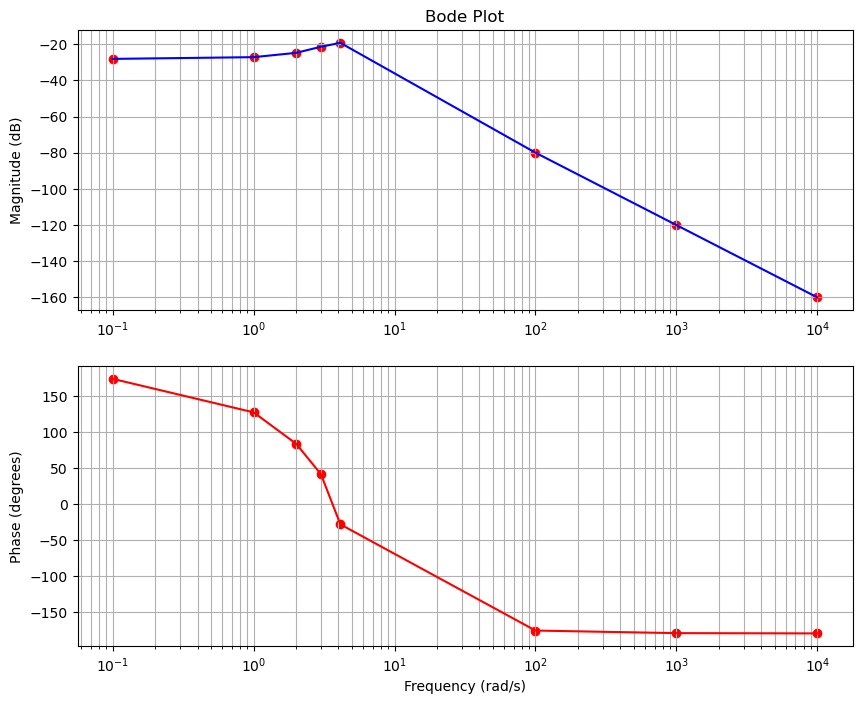

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


def transfer_function():
    freq_rad = [1*10**-1, 1*10**0, 2, 3, np.sqrt(17), 1*10**2, 1*10**3, 1*10**4]
    magnitude_dB_list = []
    phase_deg_list = []
    for freq in freq_rad:
        omega = freq
        s = 1j * omega
        H_jw = (s - 2) / ((s + 3) * (s**2 + 2*s + 17))
        magnitude_dB = 20 * np.log10(np.abs((H_jw)))
        phase_deg = np.angle(H_jw, deg=True)
        phase_deg_list.append(phase_deg)
        magnitude_dB_list.append(magnitude_dB)

    return freq_rad, magnitude_dB_list, phase_deg_list


def plot_bode_mag_and_phase(freq_rad, magnitude_dB_list, phase_deg_list):
    plt.figure(figsize=(10, 8))

    # Mag plot
    plt.subplot(2, 1, 1)
    plt.semilogx(freq_rad, magnitude_dB_list, 'b')
    plt.scatter(freq_rad, magnitude_dB_list, color='red')
    plt.title('Bode Plot')
    plt.ylabel('Magnitude (dB)')
    plt.grid(which='both', axis='both')

    # Phase plot
    plt.subplot(2, 1, 2)
    plt.semilogx(freq_rad, phase_deg_list, 'r')
    plt.scatter(freq_rad, phase_deg_list, color='red')
    plt.xlabel('Frequency (rad/s)')
    plt.ylabel('Phase (degrees)')
    plt.grid(which='both', axis='both')

    plt.show()


freq_rad, magnitude_dB_list, phase_deg_list = transfer_function()

# Create pd DF and print Df
data = {
    'Frequency (rad/s)': freq_rad,
    'Magnitude (dB)': magnitude_dB_list,
    'Phase (degrees)': phase_deg_list
}
df = pd.DataFrame(data)
print(df)

# Plot
plot_bode_mag_and_phase(freq_rad, magnitude_dB_list, phase_deg_list)